<a href="https://colab.research.google.com/github/Ishani-Patel/Old_Faithful_Geyser/blob/main/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

In [ ]:
df = pd.read_csv ("https://raw.githubusercontent.com/Ishani-Patel/Old_Faithful_Geyser/main/faithful.csv")

In [ ]:
df.head(5)

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


##Problem 1
###**a. Create and print out a scatter plot of this dataset, eruption time versus waiting time.**


In [ ]:

fig = px.scatter(df, x="eruptions", y="waiting")
fig.show()

###**b. How many clusters do you see based on your scatter plot? For the purposes of this question, a cluster is a “blob” of many data points that are close together, with regions of fewer data points between it and other “blobs”/clusters.** <br>
A. There are two cluster based on the scatter plot showed above. <br>
###**c. Describe the steps of a hierarchical clustering algorithm. Based on your scatter plot, would this method be appropriate for this dataset?**<br>
A. When using hierarchical clustering, each record is first treated as a separate cluster. The distance between each cluster and the others is then calculated; if the distance is very small, the records are then treated as belonging to the same cluster. This process is repeated until the desired number of clusters is obtained. Based on the graph this method will be appropriate.


##Problem 2
###**a.Your source code for the k-means algorithm. You need to implement the algorithm from scratch.**<br>



In [ ]:
class K_Means:
    def __init__(self, k=2, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    def fit(self,data):

        self.centroids = {}

        for i in range(self.k):
            self.centroids[i] = data[i]

        for i in range(self.max_iter):
            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []

            for featureset in data:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)

            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)

            optimized = True

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    print(np.sum((current_centroid-original_centroid)/original_centroid*100.0))
                    optimized = False

            if optimized:
                break

    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification


In [ ]:
df.values

array([[ 3.6  , 79.   ],
       [ 1.8  , 54.   ],
       [ 3.333, 74.   ],
       [ 2.283, 62.   ],
       [ 4.533, 85.   ],
       [ 2.883, 55.   ],
       [ 4.7  , 88.   ],
       [ 3.6  , 85.   ],
       [ 1.95 , 51.   ],
       [ 4.35 , 85.   ],
       [ 1.833, 54.   ],
       [ 3.917, 84.   ],
       [ 4.2  , 78.   ],
       [ 1.75 , 47.   ],
       [ 4.7  , 83.   ],
       [ 2.167, 52.   ],
       [ 1.75 , 62.   ],
       [ 4.8  , 84.   ],
       [ 1.6  , 52.   ],
       [ 4.25 , 79.   ],
       [ 1.8  , 51.   ],
       [ 1.75 , 47.   ],
       [ 3.45 , 78.   ],
       [ 3.067, 69.   ],
       [ 4.533, 74.   ],
       [ 3.6  , 83.   ],
       [ 1.967, 55.   ],
       [ 4.083, 76.   ],
       [ 3.85 , 78.   ],
       [ 4.433, 79.   ],
       [ 4.3  , 73.   ],
       [ 4.467, 77.   ],
       [ 3.367, 66.   ],
       [ 4.033, 80.   ],
       [ 3.833, 74.   ],
       [ 2.017, 52.   ],
       [ 1.867, 48.   ],
       [ 4.833, 80.   ],
       [ 1.833, 59.   ],
       [ 4.783, 90.   ],


20.568569465785416
17.489711934156336
0.38775476484080984
0.24517039664668383


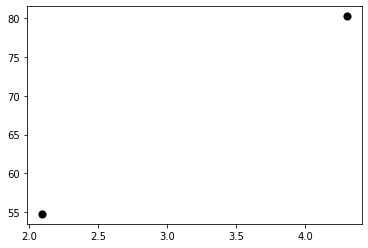

In [ ]:

model = K_Means()
model.fit(df.values)

for centroid in model.centroids:
    plt.scatter(model.centroids[centroid][0], model.centroids[centroid][1],
                marker="o", color="k", s=10, linewidths=5)

###**b. A scatter plot of your final clustering, with the data points in each cluster color-coded, or plotted with different symbols. Include the cluster centers in your plot.**<br>

In [ ]:
colors = ["blue", "orange" , "red", "green"]

def recalculate_clusters(X,centroids,k):
    clusters=dict()
    for i in range(k):
        clusters[i]=[]
    for data in X:
        e_distance=[]
        for j in range(k):
            e_distance.append(np.linalg.norm(data - centroids[j]))
        clusters[e_distance.index(min(e_distance))].append(data)
    return clusters    
 
def recalculate_centroids(centroids,clusters,k):
    for i in range(k):
        centroids[i]=np.average(clusters[i],axis=0)
    return centroids

def plot_clusters(centroids,clusters,k):
    plt.figure(figsize=(10,8))  
    area = (20)**2
    for i in range(k):
        for cluster in clusters[i]:
            plt.scatter(cluster[0],cluster[1],c=colors[i % 3])          
        plt.scatter(centroids[i][0],centroids[i][1],s=area,marker='^', edgecolors='white',c=colors[i % 3])

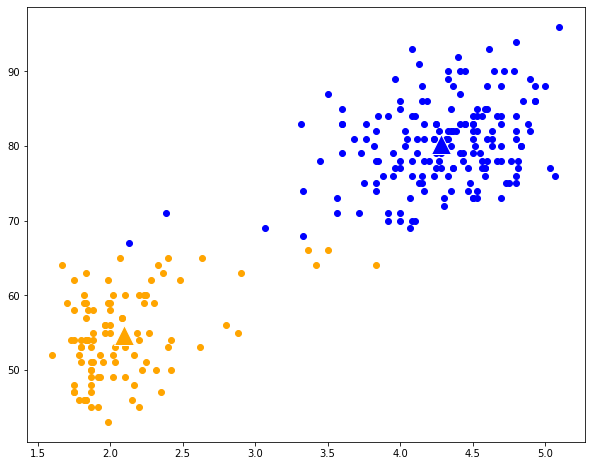

In [ ]:
k=2
X = df.values
centroids={}
for i in range(k):
    centroids[i]=X[i]
    
for i in range(1):        
    clusters=recalculate_clusters(X,centroids,k)  
    centroids=recalculate_centroids(centroids,clusters,k)
    plot_clusters(centroids,clusters,k)

###**d. Did the method manage to find the clusters that you identified in Problem 1? If not, did it help to run the method again with another random initialization?**<br>
A. Yes the method helped to find the clusters in the problem 1.<br>

Refrences: https://anderfernandez.com/en/blog/kmeans-algorithm-python/
